<a href="https://colab.research.google.com/github/Marcusng88/WIA1007-Intro-to-DS/blob/main/tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data preprocessing part 2

data integration

data transformation

data reduction


In [127]:
import numpy as np
import pandas as pd
df_salary = pd.read_csv('/content/drive/MyDrive/Dataset/salary_cleaned.csv')
df_salary.head()

,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman


In [2]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              13404 non-null  int64  
 1   Timestamp                           13403 non-null  object 
 2   Age                                 13403 non-null  object 
 3   Industry                            13403 non-null  object 
 4   Job title                           13403 non-null  object 
 5   Salary                              13403 non-null  float64
 6   Compensation                        13403 non-null  float64
 7   Currency                            13403 non-null  object 
 8   Country                             13403 non-null  object 
 9   State                               13403 non-null  object 
 10  City                                13403 non-null  object 
 11  Overall years of experience         13403

# 1. data integration
#1.1 load new dataframe


In [3]:
df_xtra_info = pd.read_csv('/content/drive/MyDrive/Dataset/xtra_info.csv')
df_xtra_info.head()

,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,8683,2.990627,4583.333333,2437.0
1,3880,2.288131,5166.666667,740.0
2,8898,3.903324,5000.000000,3806.0
3,4441,2.470852,9333.333333,4691.0
4,7537,3.559457,3750.000000,4580.0


In [4]:
df_xtra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   USERID             13404 non-null  int64  
 1   CGPA               13403 non-null  float64
 2   Salary_month_USD   13403 non-null  float64
 3   Special Bonus_GBP  13403 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 419.0 KB


In [99]:
df_master = pd.concat([df_salary,df_xtra_info],axis = 1)

In [100]:
df_master.head()

,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,4583.333333,2437.0
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,5166.666667,740.0
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,5000.000000,3806.0
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,9333.333333,4691.0
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,3750.000000,4580.0


#1.2 drop derivable data

In [101]:
#need to filter out non number column first because
# correlation analysis cannot be done on non number column
# so ,use select_dtypes(exclude='object') to filter out non number columns

df_masters = df_master.select_dtypes(exclude='object')
df_masters.head()

,USERID,Salary,Compensation,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,8683,55000.0,0.0,8683,2.990627,4583.333333,2437.0
1,3880,62000.0,3000.0,3880,2.288131,5166.666667,740.0
2,8898,60000.0,7000.0,8898,3.903324,5000.000000,3806.0
3,4441,112000.0,10000.0,4441,2.470852,9333.333333,4691.0
4,7537,45000.0,0.0,7537,3.559457,3750.000000,4580.0


In [102]:
#correlation analysis
#result 1-perfect positive correlation(one variable increase,another increase proportionally)
#-1 -perfect negative correlation(one variable increase,another decrease proportionally)
#0 no correlation
df_masters.corr()

,USERID,Salary,Compensation,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
USERID,1.000000,-0.002765,0.001515,1.000000,0.006841,-0.002765,-0.000413
Salary,-0.002765,1.000000,0.411829,-0.002765,0.005361,1.000000,0.001906
Compensation,0.001515,0.411829,1.000000,0.001515,-0.012784,0.411829,-0.001833
USERID,1.000000,-0.002765,0.001515,1.000000,0.006841,-0.002765,-0.000413
CGPA,0.006841,0.005361,-0.012784,0.006841,1.000000,0.005361,0.004139
Salary_month_USD,-0.002765,1.000000,0.411829,-0.002765,0.005361,1.000000,0.001906
Special Bonus_GBP,-0.000413,0.001906,-0.001833,-0.000413,0.004139,0.001906,1.000000


<Axes: xlabel='Salary', ylabel='Salary_month_USD'>

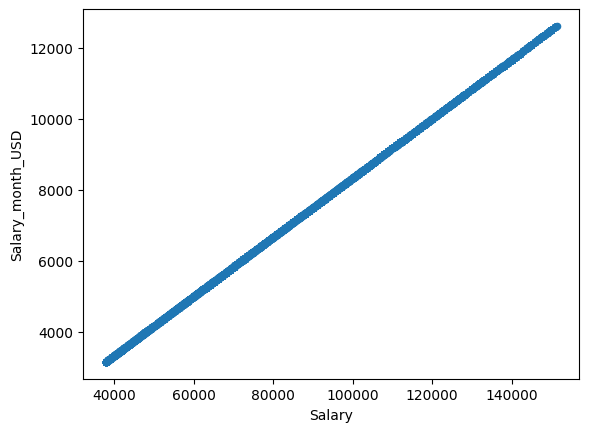

In [103]:
df_master.plot.scatter('Salary','Salary_month_USD')

In [104]:
df_master.drop(columns='Salary_month_USD',inplace = True)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              13404 non-null  int64  
 1   Timestamp                           13403 non-null  object 
 2   Age                                 13403 non-null  object 
 3   Industry                            13403 non-null  object 
 4   Job title                           13403 non-null  object 
 5   Salary                              13403 non-null  float64
 6   Compensation                        13403 non-null  float64
 7   Currency                            13403 non-null  object 
 8   Country                             13403 non-null  object 
 9   State                               13403 non-null  object 
 10  City                                13403 non-null  object 
 11  Overall years of experience         13403

#1.3 object identification

convert special bonus gdp column to usd

In [105]:
df_master['Special Bonus_GBP'] = df_master['Special Bonus_GBP']*1.22
df_master.head()

,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Special Bonus_GBP
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,2973.14
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,902.80
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,4643.32
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,5723.02
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,5587.60


In [106]:
df_master.rename(columns = {'Special Bonus_GBP':'Special Bonus_USD'},inplace = True)

#2. data transformation - normalization

min max normalization

zscore/standard normalization

#2.1 min max normalization
CAUTION - normalization should only be applied after splitting the datas into taining dataset and test dataset


array([[<Axes: title={'center': 'USERID'}>,
        <Axes: title={'center': 'Salary'}>],
       [<Axes: title={'center': 'Compensation'}>,
        <Axes: title={'center': 'USERID'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Special Bonus_USD'}>]], dtype=object)

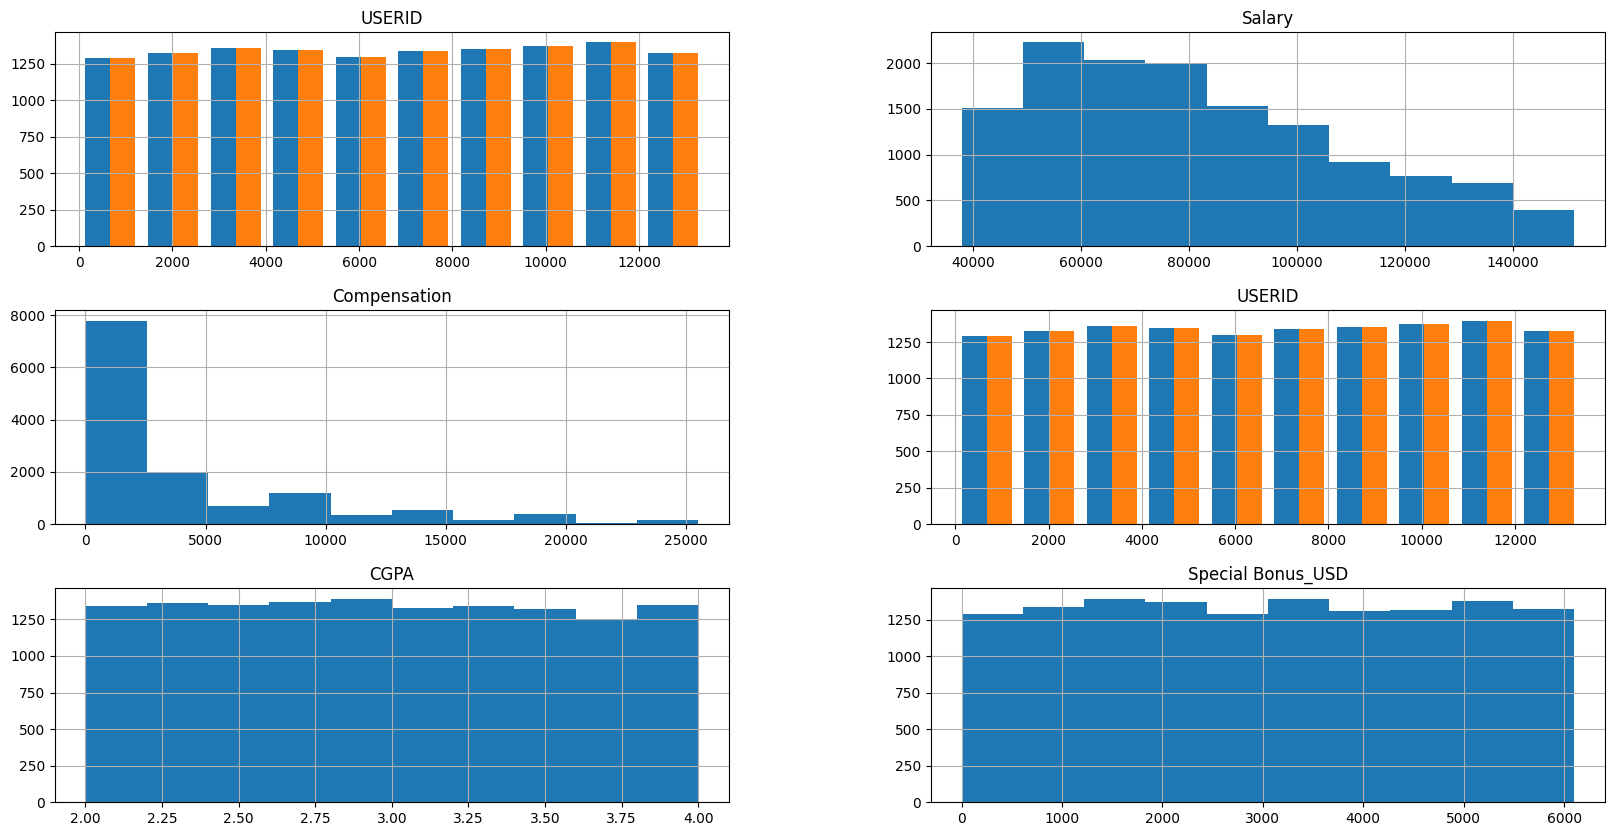

In [107]:
#before min max normalization
df_master.hist(figsize=(20,10))

# df_master['Salary'].hist()
# df_master['Compensation'].hist()
# df_master['Special Bonus_USD'].hist()


In [108]:
from sklearn import preprocessing
m = preprocessing.MinMaxScaler(feature_range =(0,1))

#apply normalization techniques
df_master_norm_min_max = df_master.copy()
df_master_norm_min_max[['Salary','Compensation','Special Bonus_USD']] = m.fit_transform(df_master_norm_min_max[['Salary','Compensation','Special Bonus_USD']])

#adter min max normalization
df_master_norm_min_max.head()


,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Special Bonus_USD
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,0.150995,0.000000,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,0.4874
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,0.212661,0.117647,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,0.1480
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,0.195042,0.274510,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,0.7612
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,0.653135,0.392157,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,0.9382
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,0.062900,0.000000,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,0.9160


array([[<Axes: title={'center': 'USERID'}>,
        <Axes: title={'center': 'Salary'}>],
       [<Axes: title={'center': 'Compensation'}>,
        <Axes: title={'center': 'USERID'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Special Bonus_USD'}>]], dtype=object)

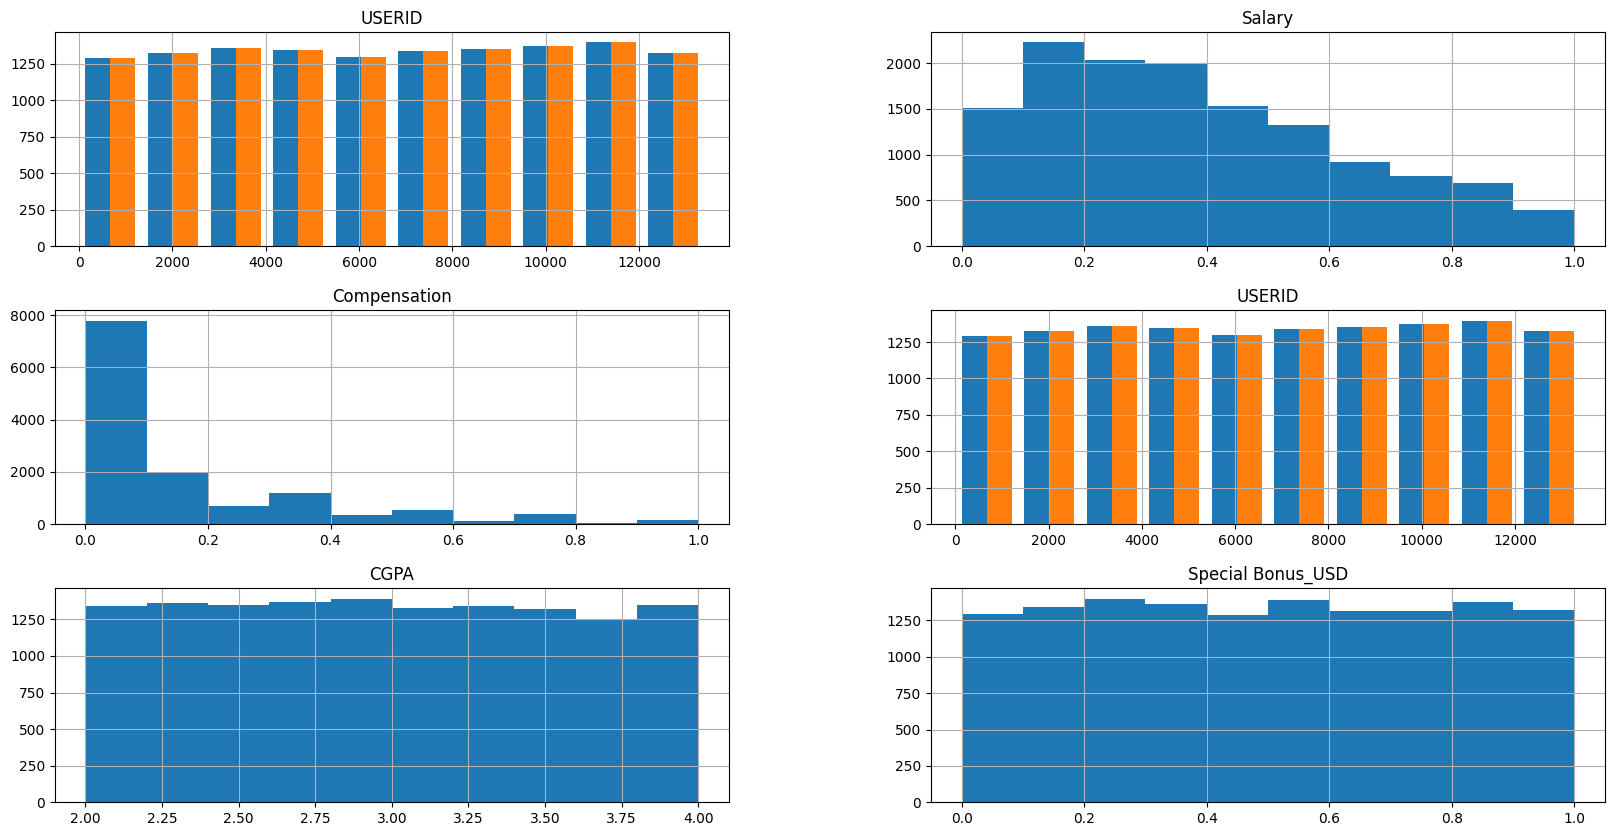

In [109]:
df_master_norm_min_max.hist(figsize = (20,10))

#2.2 z score normalization


array([[<Axes: title={'center': 'USERID'}>,
        <Axes: title={'center': 'Salary'}>],
       [<Axes: title={'center': 'Compensation'}>,
        <Axes: title={'center': 'USERID'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Special Bonus_USD'}>]], dtype=object)

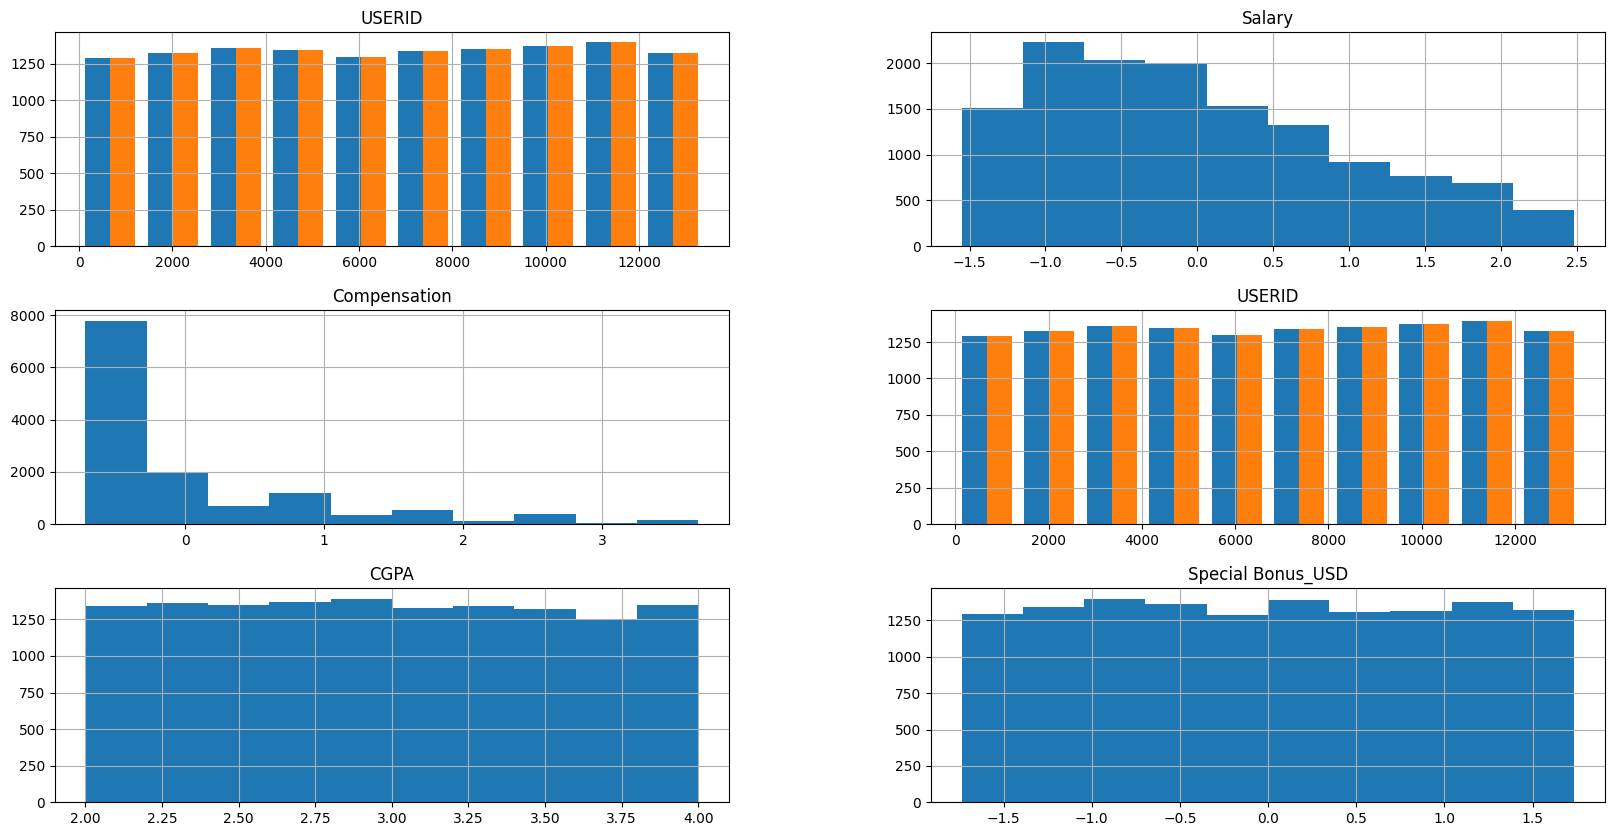

In [110]:
m = preprocessing.StandardScaler()

#apply normalization techniques
df_master_norm_std_scaler = df_master.copy()

df_master_norm_std_scaler[['Salary','Compensation',
                           'Special Bonus_USD']] = m.fit_transform(df_master_norm_std_scaler[['Salary','Compensation',
                           'Special Bonus_USD']])

# after min max normalization
df_master_norm_std_scaler.hist(figsize=(20,10))

#data reduction

#2.1 Aggregation
aggregate

groupby

aggregate and groupby

sort



In [111]:
df_master.head()

,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Special Bonus_USD
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,2973.14
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,902.80
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,4643.32
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,5723.02
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,5587.60


In [112]:
df_masters.rename(columns = {'Special Bonus_GBP':'Special Bonus_USD'},inplace = True)
df_masters.agg(['min'])

,USERID,Salary,Compensation,USERID,CGPA,Salary_month_USD,Special Bonus_USD
min,1,37860.0,0.0,1,2.000039,3155.0,0.0


In [113]:
df_masters.describe()

,USERID,Salary,Compensation,USERID,CGPA,Salary_month_USD,Special Bonus_USD
count,13404.000000,13403.000000,13403.000000,13404.000000,13403.000000,13403.000000,13403.000000
mean,6743.782901,81539.461315,4155.284936,6743.782901,2.992438,6794.955110,2501.569798
std,3862.287237,28134.315890,5778.882891,3862.287237,0.575155,2344.526324,1438.749945
min,1.000000,37860.000000,0.000000,1.000000,2.000039,3155.000000,0.000000
25%,3386.750000,59000.000000,0.000000,3386.750000,2.500295,4916.666667,1264.500000
50%,6787.500000,76000.000000,1500.000000,6787.500000,2.984247,6333.333333,2506.000000
75%,10119.000000,100000.000000,6000.000000,10119.000000,3.484162,8333.333333,3761.500000
max,13402.000000,151374.000000,25500.000000,13402.000000,3.999992,12614.500000,5000.000000


In [81]:
#want to groupby city. different cities should have different salary range

# df_master['City'].nunique()
# i=1
# for c in df_master['City'].unique():
#   print(f'{i}:{c}')
#   i+=1
#   if i==59:
#     break


In [116]:
# df_master.drop(columns=['USERID'],inplace = True)
df_masters['City'] = df_master['City']
df_masters.drop(columns=['Salary_month_USD','USERID'],inplace =True)
df_masters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salary             13403 non-null  float64
 1   Compensation       13403 non-null  float64
 2   CGPA               13403 non-null  float64
 3   Special Bonus_USD  13403 non-null  float64
 4   City               13403 non-null  object 
dtypes: float64(4), object(1)
memory usage: 523.7+ KB


In [131]:
df_by_city = df_masters.groupby('City').agg(['mean'])

<Axes: xlabel='City'>

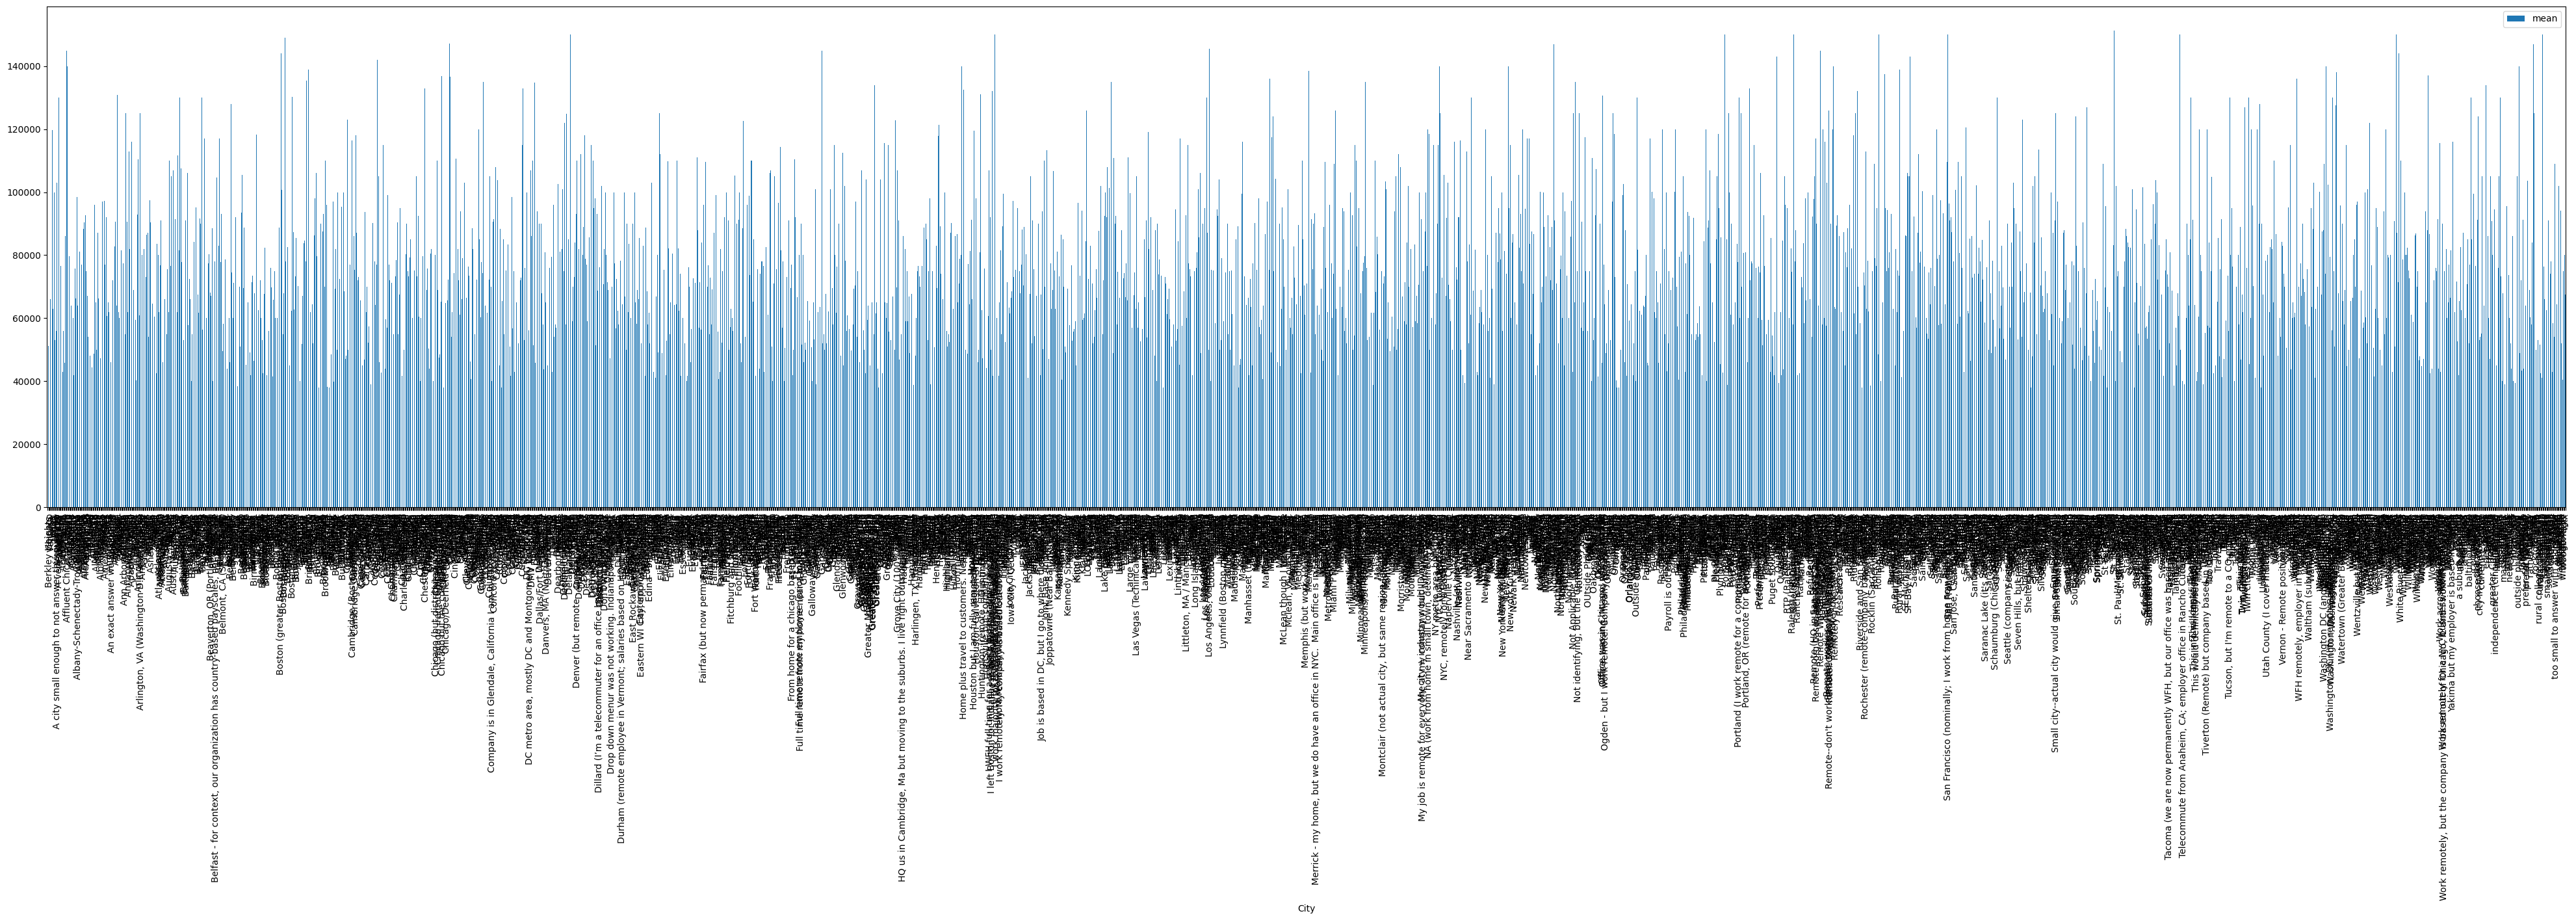

In [83]:
#rot=90 means rotate the points on x axis by 90 degree to make them more readable
#use_index = True Uses the index of the DataFrame (presumably the city) as the x-axis.
df_by_city.plot.bar(y='Salary',figsize=(50,10),use_index=True,rot=90)

In [132]:
df_by_city.sample(5)

,Salary,Compensation,CGPA,Special Bonus_USD
,mean,mean,mean,mean
City,,,,
Leesburg VA,90000.000000,2000.000000,3.533768,3501.000000
Boston,88752.353333,4508.602222,2.997070,2614.622222
Las Cruces,67200.000000,1066.666667,2.679750,2871.333333
Opelika,74554.000000,3375.000000,2.079149,4221.000000
"Bethlehem, PA",47090.000000,5000.000000,3.945023,3771.000000


In [134]:
df_by_city = df_by_city[df_by_city[('Salary','mean')]>120000]

In [136]:
df_by_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, St. Louis Park to San francisco
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (Salary, mean)             135 non-null    float64
 1   (Compensation, mean)       135 non-null    float64
 2   (CGPA, mean)               135 non-null    float64
 3   (Special Bonus_USD, mean)  135 non-null    float64
dtypes: float64(4)
memory usage: 9.3+ KB


<Axes: xlabel='City'>

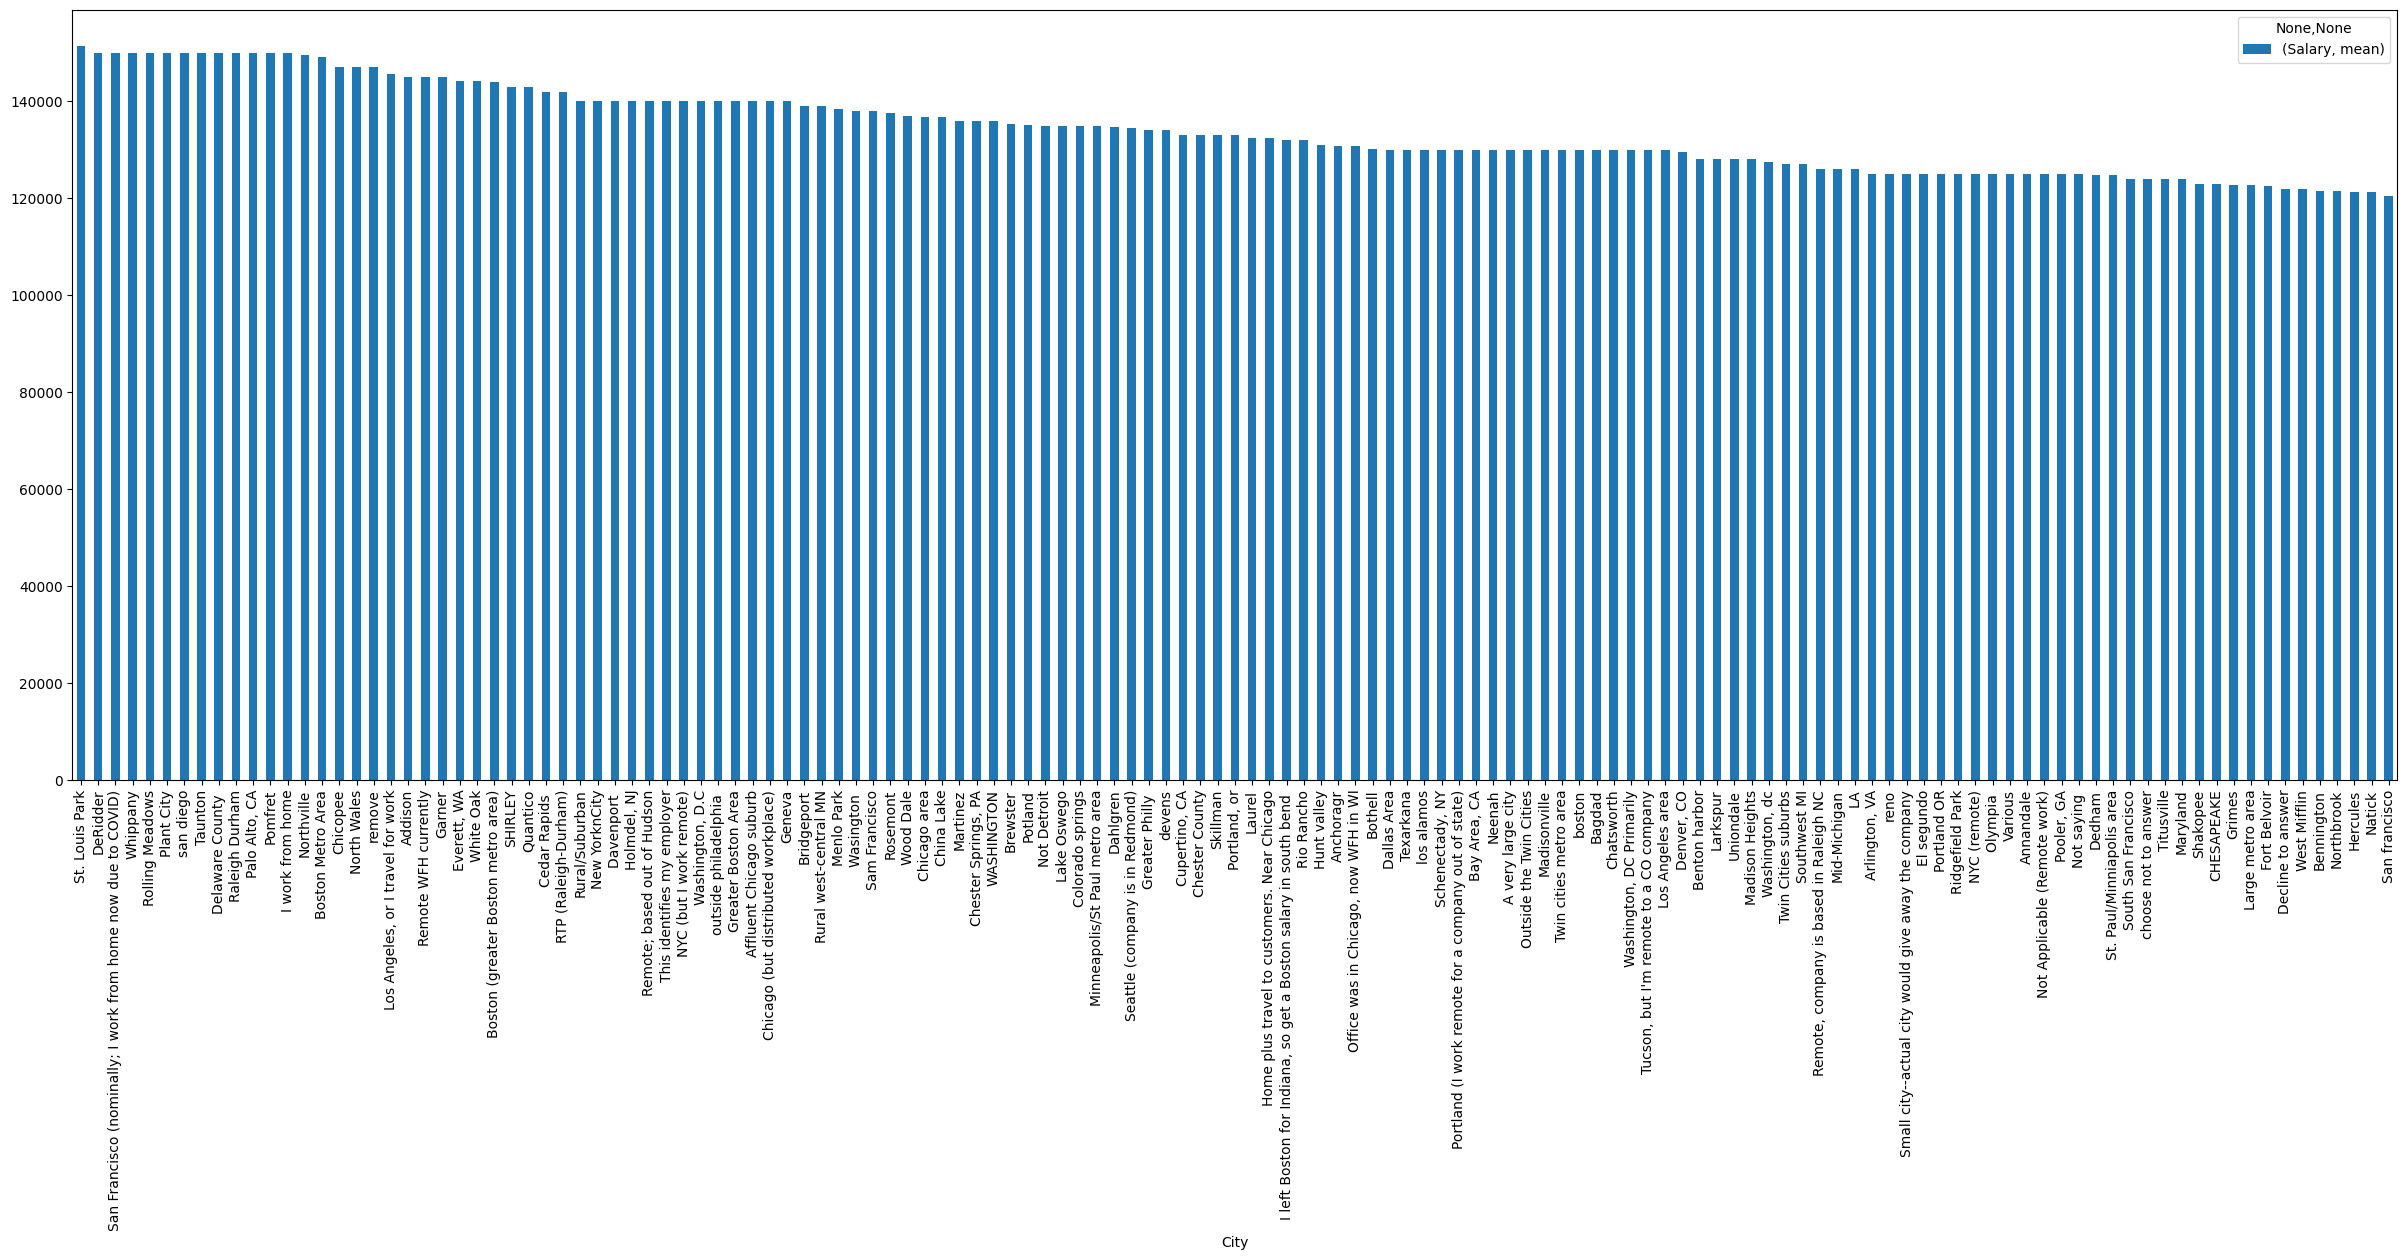

In [140]:
df_by_city = df_by_city.sort_values(by=[('Salary','mean')],ascending = False)
#When use_index=True, it tells Pandas to use the index of the DataFrame as the x-axis labels for the plot.
#This is particularly useful when the index contains meaningful labels (e.g., city names, employee IDs, dates) that you want to appear on the x-axis of your plot.
df_by_city.plot.bar(y=('Salary','mean'),figsize=(30,10),use_index= True,rot=90)